# Exercise 1, merge 2 dataframes and show the data in different plots

Start out with loading in both dataframes, also in the first one (steps.csv) add an "fillna" to fill every NaN with 0.

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


## load in the second dataframe

The second dataframe was already pretty "neat", so there wasn't any cleaning to be adhered.

In [7]:
df1 = pd.read_csv('steps.csv', sep=';')

# fill in the empty spaces in the DF by sing df.fillna(0)
df1 = df1.fillna(0)

df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## merge the 2 dataframes together, on ID. 
For this means there is a new column with ID for ID of the participents.

In [8]:
df = pd.merge(df1, df2, on = 'id')
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


## the tricky part

To start, I've grabbed the columns from "20-6-13" untill "13-5-2014". Because this is the timeframe the data was collected.
After that I've reset the index and named the row "total steps".
Also importatnt, make the "total_steps" as INT, this will be handy for later.

For here last but not least lets make the datetime more stable (or accurate?), for this i'm using the Panda's PD.to_datetime, with the errors set to "coerce", so with this if there is any faulty date it will set to NaT!

In [9]:
df_steps = df.loc[:, '20-6-2013':'13-5-2014'].sum().reset_index(name="Total_steps")

df_steps['Total_steps'] = df_steps['Total_steps'].astype(int)
df_steps['index'] = df_steps['index'].apply(pd.to_datetime, errors='coerce')


df_steps

,index,Total_steps
0,2013-06-20,87418
1,2013-06-21,2195438
2,2013-06-22,3027319
3,2013-06-23,2191243
4,2013-06-24,2871071
...,...,...
323,2014-09-05,679519
324,2014-10-05,654877
325,2014-11-05,551280
326,2014-12-05,495365


## Now to make some really neat graphs

To start, let's make a graph about the total steps set.

As we can see, the graph is slightly left skewed.
Furthermore, it looks like most of the participents only took between 1 and 4 steps per day.

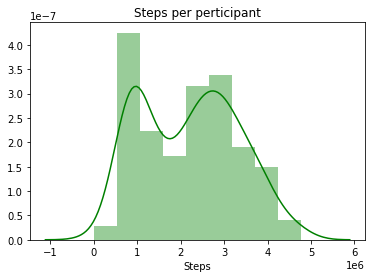

In [20]:
sns.distplot(df_steps['Total_steps'].dropna(), kde=True, color='Green') 
plt.title('Steps per perticipant')
plt.xlabel('Steps')
plt.show()

Now to make the data more 'tangable' I've decided to make an violin plot.
with this you can see that there are not really that much outliers for now.

## What about 0?

so because i've changed the "NaN" to "0" in my first dataframe (steps.csv) this is the reason I have some outliers in the violinplopt on 0.

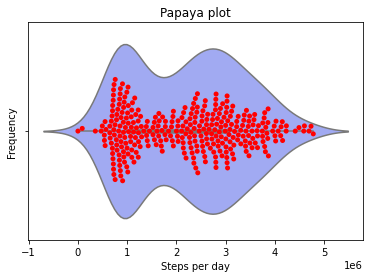

In [22]:
sns.violinplot(df_steps['Total_steps'], color='#94a0ff')
sns.swarmplot(df_steps['Total_steps'], color='red') #default color doesn't stand out
plt.title('Papaya plot')
plt.ylabel('Frequency')
plt.xlabel('Steps per day')
plt.show()

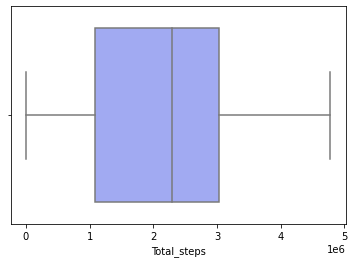

In [12]:
sns.boxplot(x=df_steps["Total_steps"], color='#94a0ff')

In this plot above we can see that the probably median is around 2/3 steps per day

## Mean and median

To finalyze this last graph, i've added the mean and median of this graph.

The mean is the total middle, its just above the 21000. While the median is a bit more to the right, about 22000 steps.

It's strange that these two are so close together.

However, what this can mean is that there are overall steps more taken than what the mean suggested.

Also, what could be taken in consideration could be that people from different backgrounds (such as an bachelor or master degree) could have a lower or an higher step count.

Because of the time limit of this exercise I didn't conclude these in my notebook.

The median steps are: 2299571.0 
The mean steps are: 2195772.100609756 


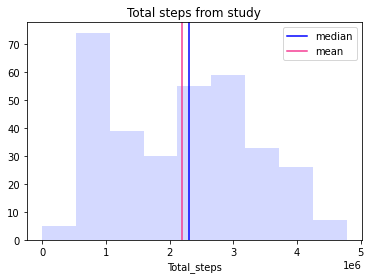

In [28]:
mean_size = df_steps['Total_steps'].mean()
median_size = df_steps['Total_steps'].median()

print(f'The median steps are: {median_size} ')
print(f'The mean steps are: {mean_size} ')

file_size = df_steps['Total_steps'].dropna()
sns.distplot(file_size, color='#94a0ff', kde=False)
plt.title('Total steps from study')
plt.axvline(median_size, 0, 100, color='blue', label='median') 
plt.axvline(mean_size, 0, 100, color='#f53b92', label='mean') 
plt.legend() 
plt.show()